## WeatherPy

The objective of this exercise is to plot various weather characteristics of randomly selected cities against those cities' latitude in order to demonstrate whether proximity to the equator correlates with temperature, wind speed, humidity, and cloudiness.

Based on the data below, here are a few of the observable trends:

- There is a strong correlation between proximity to the equator and temperature.
- Points show much less association between other characteristics, like wind speed and humidity, and latitude. The points are much more evenly distributed, suggesting that the association between and proximity to the equator is is stronger than between proximity to the equator and other measurements.
- Cities South of the equator may be more likely to have a higher humidity regardless of proximity to the equator - there are more points with lower humidities north of the equator, according to the humidity plot.

In [1]:
#Import a BUNCH of libraries and the API key for Open Weather Map API
import json
import os
import requests
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from citipy import citipy
from config import api_key
import time
import seaborn as sns
sns.set()

#Establish lists to store weather data
lat_list = []
temp_list = []
city_list = []
country_list = []
city_id_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
city_no_counter = 0

#Look back to one week ago, selecting a 24 hour period with start and end times
current_time = time.time()
pull_time_start = current_time - 691200
pull_time_end = current_time - 604800

#Specify font formatting for plots
plot_title_fonts = {'family':'sans-serif', 'size':18}
axis_label_fonts = {'family':'sans-serif', 'size':14}  

In [2]:
#Create exception for duplicate entries to ensure unique entries and aid the script in dealing with duplicates

class Error(Exception):
   pass

class ValueNotUnique(Error):
   pass


In [3]:
#Pull data! While loop ensures that the final set of city data includes the number of entries desired
while len(set(city_id_list)) < 500:
    try:
        current_lat = round(random.uniform(-90.0, 90.0), 6)
        current_lon = round(random.uniform(-180.0, 180), 6)
        current_city = citipy.nearest_city(current_lat, current_lon).city_name
        current_country = citipy.nearest_city(current_lat, current_lon).country_code
        query_url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=metric&q={current_city},{current_country}&type=hour&start={pull_time_start}&end={pull_time_end}"
        per_city_json = requests.get(query_url).json()
        #If there is no city ID, data is not qualified - skip entry
        if per_city_json['id']:
            #If the city ID already exists in the list, data is not qualified skip entry
            if per_city_json['id'] in set(city_id_list):
                #Let user know that the loop has been restarted
                print("City returned already exists in list - retrying a new entry.")
                raise ValueNotUnique
                break
            #If the city ID exists and is unique, add city data to city data lists    
            else:
                city_id_list.append(per_city_json['id'])
                lat_list.append(per_city_json['coord']['lat'])
                temp_list.append(per_city_json['main']['temp'])
                current_city = per_city_json['name']
                city_list.append(current_city)
                country_list.append(per_city_json['sys']['country'])
                humidity_list.append(per_city_json['main']['humidity'])
                cloudiness_list.append(per_city_json['clouds']['all'])
                wind_speed_list.append(per_city_json['wind']['speed'])
                city_no_counter = city_no_counter + 1
                #Print current status of data pull
                print(f"Currently processing city no. {city_no_counter}:\n{current_city}, {current_country}\nCity ID: {per_city_json['id']}\nRequest URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q={current_city},{current_country}&type=hour&start={pull_time_start}&end={pull_time_end}")
        #Determine whether or not an undesirable code has been returned - if so, pause data pull to prevent running
        #into caps
        else:
            cod = cod = per_city_json['cod']
            if cod != 200:
                time.sleep(60)
                #Let user know the script is on hold
                print('Waiting 1 minute before next API call.')
            else:
                print('No City ID returned - retrying a new entry.')
                pass
    #If there is an exception, restart while loop        
    except:
        pass



Currently processing city no. 1:
Bathsheba, bb
City ID: 3374083
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Bathsheba,bb&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 2:
Lityn, ua
City ID: 702931
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Lityn,ua&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 3:
Fortuna, us
City ID: 5563839
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Fortuna,us&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 4:
Hobart, au
City ID: 2163355
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Hobart,au&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 5:
Nikko, jp
City ID: 185

Currently processing city no. 34:
Igarka, ru
City ID: 1505991
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Igarka,ru&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 35:
Mega, et
City ID: 331259
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Mega,et&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 36:
Hermanus, za
City ID: 3366880
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Hermanus,za&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 37:
Santa Marta, co
City ID: 3668605
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Santa Marta,co&type=hour&start=1522027675.5241148&end=15221

Currently processing city no. 66:
Zemio, cf
City ID: 235826
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Zemio,cf&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 67:
Antalaha, mg
City ID: 1071296
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Antalaha,mg&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 68:
Aykhal, ru
City ID: 2027296
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Aykhal,ru&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 69:
Dwarka, in
City ID: 1273294
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=D

Currently processing city no. 97:
East London, za
City ID: 1006984
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=East London,za&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 98:
Butaritari, ki
City ID: 2110227
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Butaritari,ki&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 99:
Sobolevo, ru
City ID: 525426
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Sobolevo,ru&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 100:
Piacabucu, br
City ID: 3454005
Request URL (minus API

Currently processing city no. 126:
Myaundzha, ru
City ID: 2123100
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Myaundzha,ru&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 127:
Bull Savanna, jm
City ID: 3491161
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Bull Savanna,jm&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 128:
Verkhnyaya Toyma, ru
City ID: 474470
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Verkhnyaya Toyma,ru&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 129:
Marystown, ca
City ID: 6067472
Req

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 152:
Shingu, jp
City ID: 1847947
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Shingu,jp&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 153:
Berlevag, no
City ID: 780687
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Berlevag,no&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 154:
Tiksi, ru
City ID: 2015306
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Tiksi,ru&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retry

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 176:
Grand-Lahou, ci
City ID: 2288105
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Grand-Lahou,ci&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 177:
Taywarah, af
City ID: 1122464
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Taywarah,af&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 178:
Katsuura, jp
City ID: 1865309
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Katsuura,jp&type=hour&start=15220276

Currently processing city no. 201:
Rundu, na
City ID: 3353383
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Rundu,na&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 202:
Te Anau, nz
City ID: 2181625
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Te Anau,nz&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 203:
Tshela, cd
City ID: 2311127
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Tshela,cd&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 204:
Sibolga, id
City ID: 1213855
Request URL (minus API key): http://api.op

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 228:
Kytmanovo, ru
City ID: 1500990
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Kytmanovo,ru&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 229:
Carnarvon, au
City ID: 2074865
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Carnarvon,au&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exis

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 252:
Manokwari, id
City ID: 1636308
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Manokwari,id&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 253:
Chulman, ru
City ID: 2025261
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Chulman,ru&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists i

Currently processing city no. 273:
Flinders, au
City ID: 6255012
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Flinders,au&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 274:
Ahipara, nz
City ID: 2194098
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Ahipara,nz&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 275:
Pisco, pe
City ID: 3932145
Request URL (minus API key): ht

City returned already exists in list - retrying a new entry.
Currently processing city no. 297:
Andenes, no
City ID: 3163146
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Andenes,no&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 298:
Castrillon, es
City ID: 3125723
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Castrillon,es&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 299:
Hobyo, so
City ID: 57000
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Hobyo,so&type=hour&start=1522027675.5241148&e

City returned already exists in list - retrying a new entry.
Currently processing city no. 325:
Yulara, au
City ID: 6355222
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Yulara,au&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 326:
Jacareacanga, br
City ID: 3397763
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Jacareacanga,br&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 327:
Cidreira, br
City ID: 3466165
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Cidreira,br&type=hour&start=1522027675

Currently processing city no. 347:
Zharkent, kz
City ID: 1520253
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Zharkent,kz&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 348:
Sorong, id
City ID: 1626542
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Sorong,id&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 349:
Yaguajay, cu
City ID: 3533826
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Yaguajay,cu&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 350:
Tshane, bw
City ID: 933726
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Tshane,bw&type=hour&start=1522027675.5241148&end=152

Currently processing city no. 373:
Nanortalik, gl
City ID: 3421765
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Nanortalik,gl&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 374:
Monrovia, lr
City ID: 2274895
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Monrovia,lr&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 375:
Marshall, us
City ID: 4243951
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Marshall,us&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 376:
Margate, za
City ID: 978895
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET

City returned already exists in list - retrying a new entry.
Currently processing city no. 397:
Maumere, id
City ID: 1635815
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Maumere,id&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 398:
Ayagoz, kz
City ID: 1525988
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Ayagoz,kz&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 399:
Tijara, in
City ID: 1254538
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Tijara,in&type=hour&start=1522027675.5241148&end=1522114075.5241148
Currently processing city no. 400:
Fare, pf

City returned already exists in list - retrying a new entry.
Currently processing city no. 421:
Ambon, id
City ID: 1651531
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Ambon,id&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 422:
Saint-Pierre, pm
City ID: 3424934
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Saint-Pierre,pm&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists

City returned already exists in list - retrying a new entry.
Currently processing city no. 443:
Ruteng, id
City ID: 1629380
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Ruteng,id&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 444:
Coquimbo, cl
City ID: 3893629
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Coquimbo,cl&type=hour&start=1522027675.5241

Currently processing city no. 465:
Sumbe, ao
City ID: 3346015
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Sumbe,ao&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 466:
Fukue, jp
City ID: 1848373
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Fukue,jp&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
Currently processing city no. 467:
Santa Isabel do Rio Negro, br
City ID: 3662489
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=

City returned already exists in list - retrying a new entry.
Currently processing city no. 486:
Buala, sb
City ID: 2109528
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Buala,sb&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 487:
Guaymas, mx
City ID: 4005143
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Guaymas,mx&type=hour&start=1522027675.5241148&end=1522114075.5241148
City returned already exists in list - retrying a new entry.
City returned already exists in list -

# One note on the method used to gather this data:

There is a MUCH faster way to gather this data. While this code allows for a random pull, checked for uniqueness, this particular API offers a list of all City ID entries. It is much faster to select a number and use random.choice() to select City IDs and then look up results by City ID. This allows us to ensure that each City ID is a unique value before we pull our data. However, this does not include citipy's filter for cities over population 500 - the one notable drawback to the alternate method.

In [4]:
#Create and organize DataFrame
rand_weather_pull_df = pd.DataFrame({'City':city_list,'City ID':city_id_list,'Country':country_list,'Temperature':temp_list,'Latitude':lat_list,'Humidity': humidity_list,'Wind Speed': wind_speed_list,'Cloudiness': cloudiness_list})
rand_weather_pull_df = rand_weather_pull_df[['City','Country','City ID','Latitude','Temperature','Wind Speed','Humidity','Cloudiness']]
rand_weather_pull_df.head()

,City,Country,City ID,Latitude,Temperature,Wind Speed,Humidity,Cloudiness
0,Bathsheba,BB,3374083,13.22,25.0,6.70,83,40
1,Lityn,UA,702931,49.32,1.5,5.21,84,36
2,Fortuna,US,5563839,40.60,12.0,8.20,58,1
3,Hobart,AU,2163355,-42.88,21.0,7.70,40,75
4,Nikko,JP,1855395,36.75,16.0,1.50,67,75


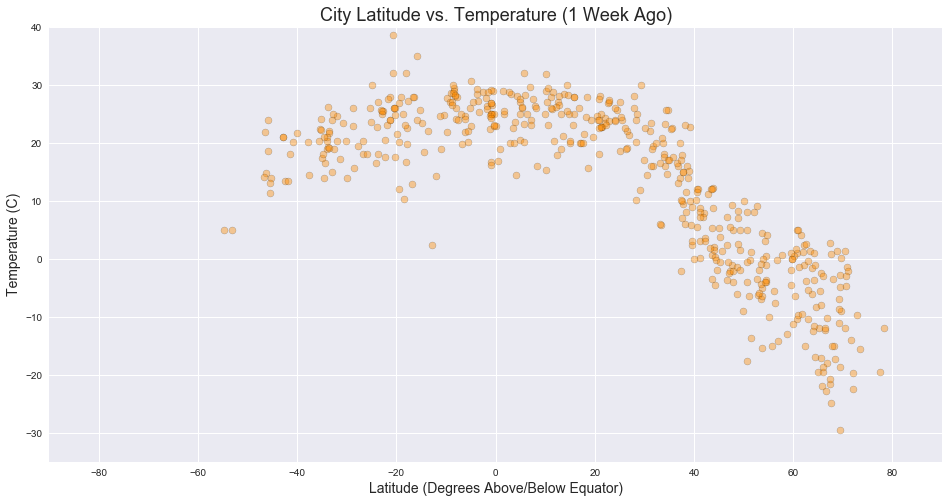

In [10]:
#Plot temperature against latitude
weather_plot, temp = plt.subplots(figsize=(16,8))

temp.scatter(x=rand_weather_pull_df['Latitude'], y=rand_weather_pull_df['Temperature'], alpha=0.4, edgecolors='k',
            color='darkorange')
temp.set_title('City Latitude vs. Temperature (1 Week Ago)', fontdict=plot_title_fonts)
temp.set_ylabel('Temperature (C)', fontdict=axis_label_fonts)
temp.set_xlabel('Latitude (Degrees Above/Below Equator)', fontdict=axis_label_fonts)
temp.set_xlim(-90,90)
temp.set_ylim(-35, 40)

#Save plot
temp_plot_save_path = os.path.join("saved-figures", "temp_plot.png")
plt.savefig(temp_plot_save_path, dpi=300)

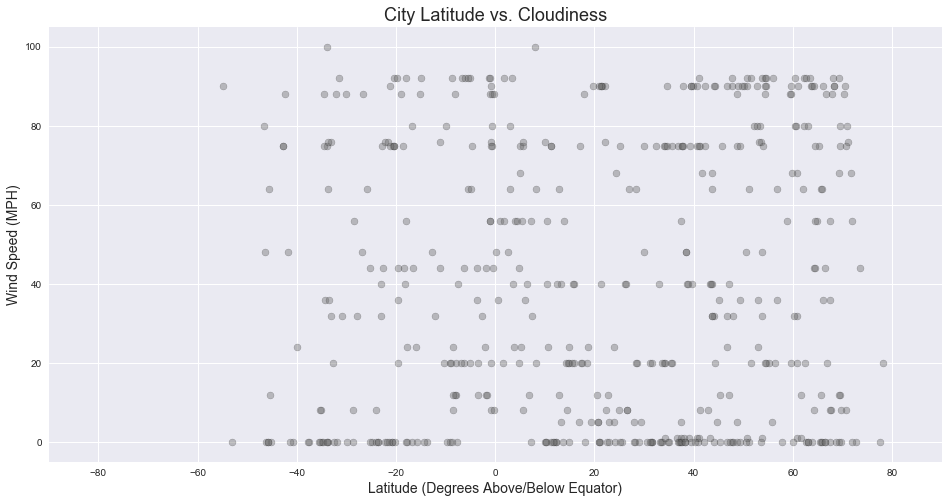

In [11]:
#Plot cloudiness against latitude
weather_plot, cloud = plt.subplots(figsize=(16,8))

cloud.scatter(x=rand_weather_pull_df['Latitude'], y=rand_weather_pull_df['Cloudiness'], alpha=0.4, edgecolors='k',
             color='dimgray')
cloud.set_title('City Latitude vs. Cloudiness', fontdict=plot_title_fonts)
cloud.set_ylabel('Wind Speed (MPH)', fontdict=axis_label_fonts)
cloud.set_xlabel('Latitude (Degrees Above/Below Equator)', fontdict=axis_label_fonts)
cloud.set_xlim(-90,90)
cloud.set_ylim(-5,105)

#Save plot
cloud_plot_save_path = os.path.join("saved-figures", "cloud_plot.png")
plt.savefig(cloud_plot_save_path, dpi=300)

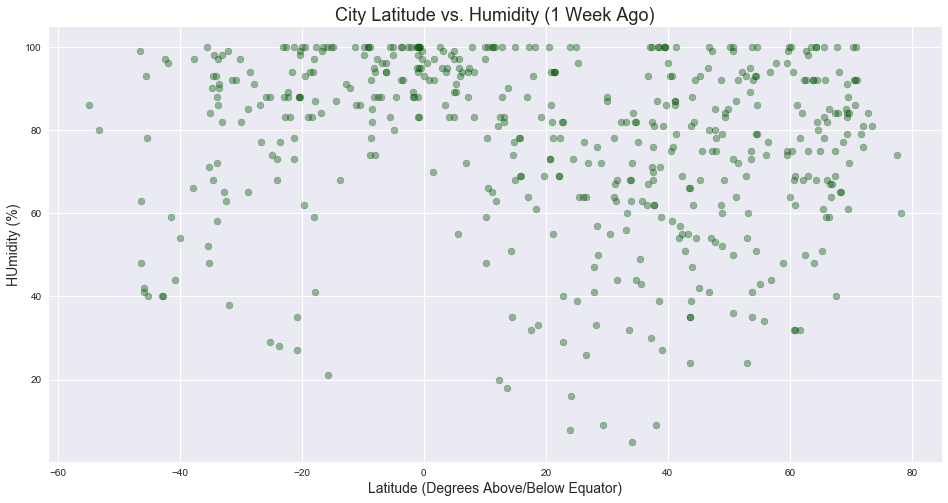

In [12]:
#Plot humidity against latitude
weather_plot, humid = plt.subplots(figsize=(16,8))
humid.scatter(x=rand_weather_pull_df['Latitude'], y=rand_weather_pull_df['Humidity'], alpha=0.4, edgecolors='k',
             color='darkgreen')
humid.set_title('City Latitude vs. Humidity (1 Week Ago)', fontdict=plot_title_fonts)
humid.set_ylabel('HUmidity (%)', fontdict=axis_label_fonts)
humid.set_xlabel('Latitude (Degrees Above/Below Equator)', fontdict=axis_label_fonts)
temp.set_xlim(-90,90)
temp.set_ylim(-5,105)

#Save plot
humid_plot_save_path = os.path.join("saved-figures", "humid_plot.png")
plt.savefig(humid_plot_save_path, dpi=300)

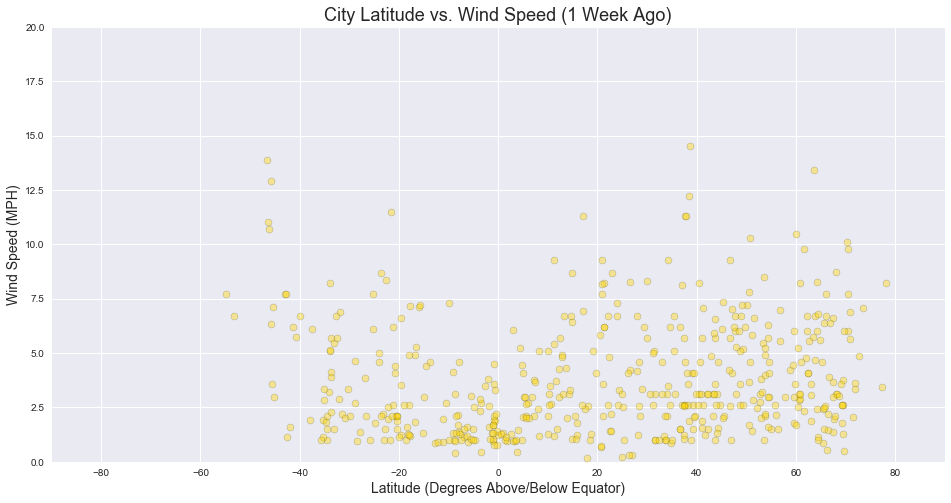

In [15]:
#Plot wind speed against latitude
weather_plot, wind = plt.subplots(figsize=(16,8))
wind.scatter(x=rand_weather_pull_df['Latitude'], y=rand_weather_pull_df['Wind Speed'], alpha=0.4, edgecolors='k',
            color='gold')
wind.set_title('City Latitude vs. Wind Speed (1 Week Ago)', fontdict=plot_title_fonts)
wind.set_ylabel('Wind Speed (MPH)', fontdict=axis_label_fonts)
wind.set_xlabel('Latitude (Degrees Above/Below Equator)', fontdict=axis_label_fonts)
wind.set_xlim(-90,90)
wind.set_ylim(0,20)

#Save plot
wind_plot_save_path = os.path.join("saved-figures", "wind_plot.png")
plt.savefig(wind_plot_save_path, dpi=300)

In [16]:
#Save DataFrame as csv
save_csv_path = os.path.join('weatherpy.csv')
rand_weather_pull_df.to_csv(save_csv_path, index=False)
